## Observations and Insights 

In [221]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_data = pd.merge(mouse_metadata, study_results, on= 'Mouse ID', how= 'right')
# Display the data table for preview
mousestudy_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,b128,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,10,43.270852,0
3,b128,Capomulin,Female,9,22,15,43.784893,0
4,b128,Capomulin,Female,9,22,20,42.731552,0


In [101]:
# Checking the number of mice.
count_mice = mousestudy_data['Mouse ID'].count()
print("The number of times mice were examined in this study were: ", (count_mice))

The number of times mice were examined in this study were:  1893


In [102]:
# Before beginning the analysis, check the data for any mouse ID with duplicate time points 
# and remove any data associated with that mouse ID.
mousestudy_cleandata = mousestudy_data.drop_duplicates(subset= ['Mouse ID', 'Timepoint'])

In [224]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousestudy_cleandata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,b128,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,10,43.270852,0
3,b128,Capomulin,Female,9,22,15,43.784893,0
4,b128,Capomulin,Female,9,22,20,42.731552,0


In [225]:
# Checking the number of mice in the clean DataFrame.
count_mice = mousestudy_cleandata['Mouse ID'].count()
print("The number of times mice were examined in this study were: ", (count_mice))

The number of times mice were examined in this study were:  1888


## Summary Statistics

In [228]:
# Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each drug regimen.
drugregimen_group = mousestudy_cleandata.groupby(["Drug Regimen"])
drugregimen_group

#Tumor Size Mean
tumor_mean = drugregimen_group["Tumor Volume (mm3)"].mean()
#Tumor Size Median
tumor_median = drugregimen_group["Tumor Volume (mm3)"].median()
#Tumor Size Variance
tumor_variance = drugregimen_group["Tumor Volume (mm3)"].var()
#Tumor Size Standard Deviation
tumor_std = drugregimen_group["Tumor Volume (mm3)"].std()
#Tumor Size SEM
tumor_sem = drugregimen_group["Tumor Volume (mm3)"].sem()

#Summary Statistics Table
tumor_statsummary = pd.DataFrame({"Mean": tumor_mean, "Median": tumor_median, "Variance": tumor_variance, "Standard Deviation": tumor_std, "SEM": tumor_sem})
tumor_statsummary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [106]:
# Generate a bar plot using Pandas's DataFrame.plot() that shows  
# the number of total mice for each treatment regimen throughout the course of the study.

# Count Mouse ID's used in each Drug Regimen

### NOTE: I cleaned the data to show each Mouse ID only once per Drug Regimen, 
### instead of the Mouse ID showing at each time interval that the tumor was measured,
### thus, getting the correct number of Mice used per each Drug Regimen

mousestudy_supercleandata = mousestudy_data.drop_duplicates(subset= ['Mouse ID'])
drugregimen_counts = mousestudy_supercleandata.groupby(["Drug Regimen"]).count()["Mouse ID"]
drugregimen_counts

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

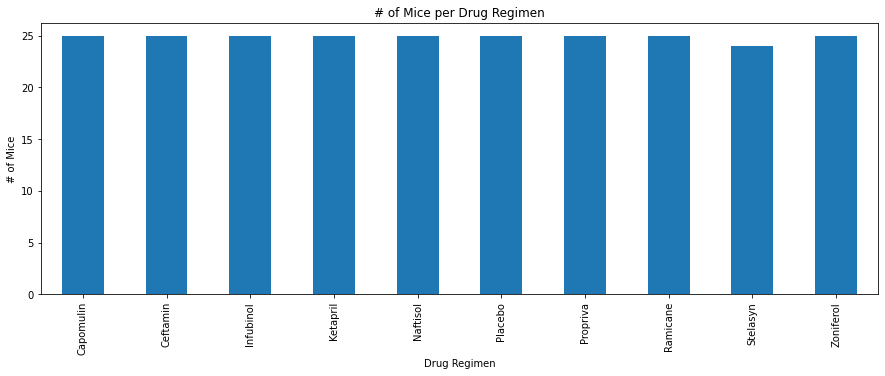

In [107]:
#Bar Plot using Panda's DataFrame.plot()
drugregimen_counts.plot(kind="bar", figsize=(15,5))

#set chart title
plt.title("# of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")

#show chart and set layout
plt.show()

Text(0, 0.5, '# of Mice')

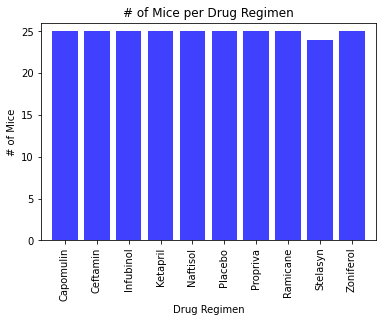

In [128]:
# Generate a bar plot using Matplotlib's pyplot that shows  
# the number of total mice for each treatment regimen throughout the course of the study.

#Create Array with the datapoints
users = [25, 25, 25, 25, 25, 25, 25, 25, 24, 25]

#Set x_axis to the drug regimen counts
x_axis = np.arange(len(drugregimen_counts))

# Tell MatPlotLib that we want to make a bar chart & set xticks
plt.bar(x_axis, users, color='b', alpha= 0.75, align="center")
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

# Sets the x limits of the current chart to match the chart above
plt.xlim(-.75, len(x_axis)-.25)

# Sets the y limits of the current chart to match the chart above
plt.ylim(0, max(users)+1)

# Set Labels
plt.title("# of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")

In [135]:
# Generate a pie plot using Pandas's DataFrame.plot() that shows 
# the distribution of female or male mice in the study.
gender_group = mousestudy_supercleandata.groupby(["Mouse ID","Sex"])
gender_group

#Create DataFrame to be used to tally male and female mice
gender_df = pd.DataFrame(gender_group.size())

#Create DataFrame with total count of male & female mice referencing gender_df
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Mice Studied"]

###Now get percentages to create Pie Plot###
mouse_gender["% of Sex"] = (100*((mouse_gender["Mice Studied"])/(mouse_gender["Mice Studied"].sum())))
mouse_gender["% of Sex"] = mouse_gender["% of Sex"]

#Show mouse_gender DataFrame
mouse_gender

,Mice Studied,% of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


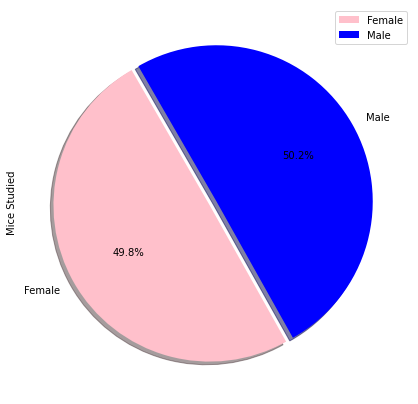

In [143]:
#Generate a pie plot using Pandas's DataFrame.plot() & the dataframe above
colors = ['pink', 'blue']
explode = (0.05, 0)
plot = mouse_gender.plot.pie(y='Mice Studied',figsize=(7,10), colors = colors, startangle=120, explode = explode, shadow = True, autopct="%1.1f%%")

(-1.156088859357418,
 1.1385516836321594,
 -1.1372747920091575,
 1.1376738381425737)

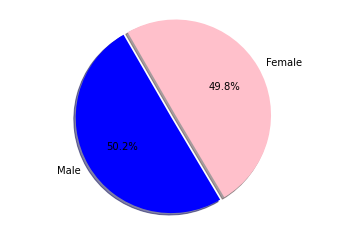

In [145]:
# Generate a pie plot using Matplotlib's pyplot that shows 
# the distribution of female or male mice in the study.

# Create Labels for Male & Female
labels = ["Male","Female"]

#List the values of each section of the pie chart
sizes = [50.200803,49.799197]

#Set colors for each section of the pie
colors = ['blue', 'pink']

#Determoine which section of the circle to detach
explode = (0.05, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, labels=labels, colors=colors, startangle=120, explode=explode, shadow=True, autopct="%1.1f%%")

#Set equal axis
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [154]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#1st Create dataFrame with only Top 4 regimens, sorted by timepoint
top_four = mousestudy_cleandata[mousestudy_cleandata["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_four = top_four.sort_values(["Timepoint"], ascending=True)
top_regimens_df =top_four[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

#Then, capture the LAST tumor measurement for each mouse, sorted within each drug regimen
top_regimens_sort = top_regimens_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
top4reg_df = top_regimens_sort.to_frame()
top4reg_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

In [159]:
# Calculate the quartiles and IQR and quantitatively 
# determine if there are any potential outliers across all four treatment regimens.
# If the data is in a dataframe, we use pandas to give quartile calculations

tumorsize = top4reg_df["Tumor Volume (mm3)"]

quartiles = tumorsize.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile across all four treatment regimens is: {lowerq}'(mm3)'")
print(f"The upper quartile across all four treatment regimens is: {upperq}'(mm3)'")
print(f"The interquartile range across all four treatment regimens is: {iqr}'(mm3)'")
print(f"The the median across all four treatment regimens is: {quartiles[0.5]}'(mm3)'")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound}'(mm3)' could be outliers.")
print(f"Values above {upper_bound}'(mm3)' could be outliers.")

The lower quartile across all four treatment regimens is: 37.187743802499995'(mm3)'
The upper quartile across all four treatment regimens is: 59.930261755000004'(mm3)'
The interquartile range across all four treatment regimens is: 22.74251795250001'(mm3)'
The the median across all four treatment regimens is: 45.0'(mm3)'
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


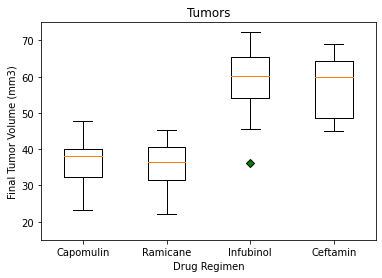

In [186]:
# Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and 
# highlight any potential outliers in the plot by changing their color and style.

#Xaxis
top4reg_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#Yaxis
boxplot_df = top4reg_df.reset_index()
drugreg_tumvol = boxplot_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
drugreg_tumvol_df = pd.DataFrame(drugreg_tumvol)
drugreg_tumvol_df = drugreg_tumvol_df.reindex(top4reg_list)
volume_list = [x for x in drugreg_tumvol_df['Tumor Volume (mm3)']]

#Changed Outlier Symbols to Green Diamonds
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()

#Set labels
ax3.set_title('Tumors')
ax3.set_ylabel('Final Tumor Volume (mm3)')
ax3.set_xlabel('Drug Regimen')

#BoxPlot
ax3.boxplot(volume_list, flierprops=green_diamond, labels=top4reg_list)
plt.ylim(15, 75)
plt.show()

## Line and Scatter Plots

In [190]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#First, Create data frame of the chosen Mouse ID
tumor_vol_over_time = mousestudy_cleandata.loc[mousestudy_cleandata["Mouse ID"] == "f966",:]
tumor_vol_over_time.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1878,f966,Capomulin,Male,16,17,0,45.000000,0
1879,f966,Capomulin,Male,16,17,5,38.796474,0
1880,f966,Capomulin,Male,16,17,10,35.624403,0
1881,f966,Capomulin,Male,16,17,15,32.623003,0
1882,f966,Capomulin,Male,16,17,20,30.485985,0


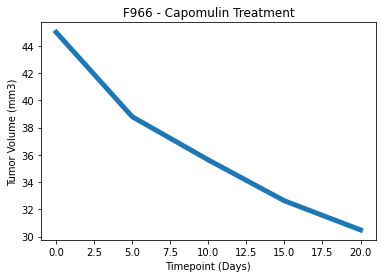

In [191]:
#Then, Create Line Plot
x_axis = tumor_vol_over_time["Timepoint"]
tumor_volume = tumor_vol_over_time["Tumor Volume (mm3)"]

plt.title('F966 - Capomulin Treatment')
plt.plot(x_axis, tumor_volume, linewidth=5, markersize=15)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

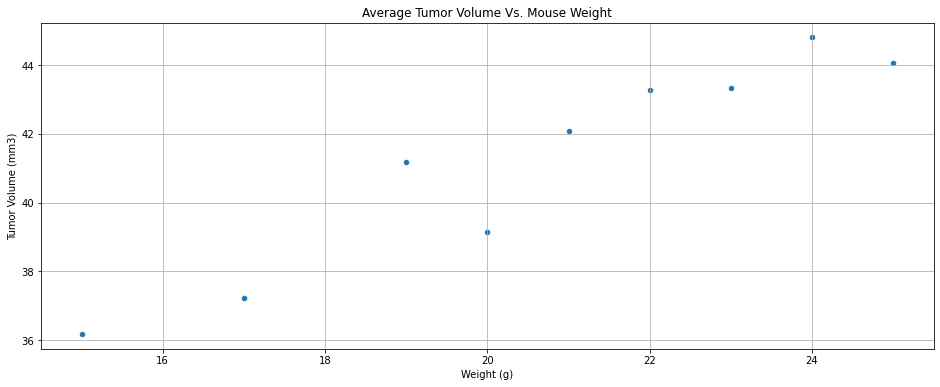

In [206]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Grab only Capomulin data
capomulin_only = mousestudy_cleandata[mousestudy_cleandata["Drug Regimen"].isin(["Capomulin"])]

#Drill down Wieght & Volume
capomulin_vol_weight = capomulin_only[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

#Avg Wieght & Volume
avg_weight_vol = capomulin_vol_weight_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

#Create DataFrame to plot
capomulin_group_weight_vol_df = pd.DataFrame(avg_weight_vol).reset_index()

#Plot Scatter Plot
capomulin_scatter_plot = capomulin_group_weight_vol_df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)',title="Average Tumor Volume Vs. Mouse Weight", grid = True, figsize= (16,6))

## Correlation and Regression

In [219]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin treatment

correlation = st.pearsonr(capomulin_group_weight_vol_df['Weight (g)'], capomulin_group_weight_vol_df['Tumor Volume (mm3)'])
print(f"The correlation coefficient between average mouse weight and average tumor volume within the subgroup of mice who were treated with Capomulin is: {round(correlation[0],2)}")

The correlation coefficient between average mouse weight and average tumor volume within the subgroup of mice who were treated with Capomulin is: 0.95


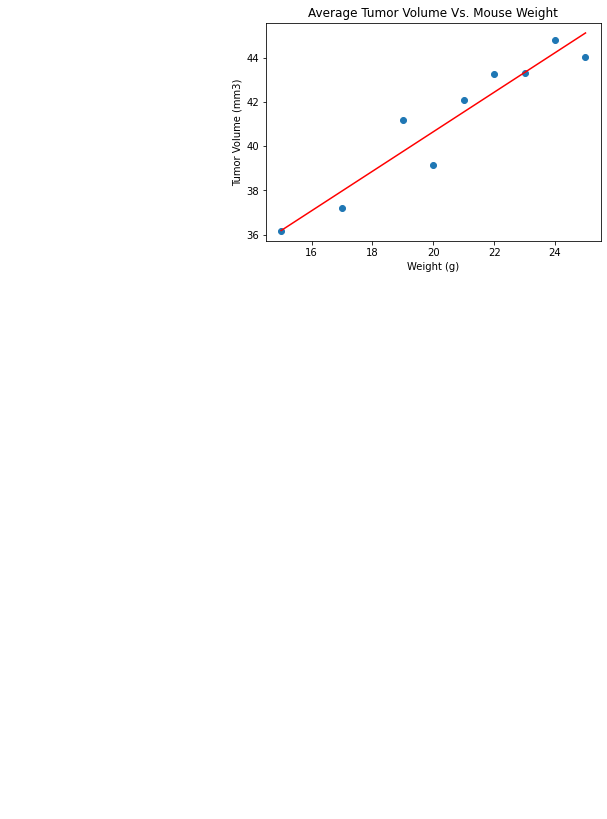

In [223]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = capomulin_group_weight_vol_df['Weight (g)']
y_values = capomulin_group_weight_vol_df['Tumor Volume (mm3)']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#Plot Scatter & Linear Regression
plt.title('Average Tumor Volume Vs. Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()